              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1033
           1       0.44      0.45      0.45       374

    accuracy                           0.70      1407
   macro avg       0.62      0.62      0.62      1407
weighted avg       0.70      0.70      0.70      1407



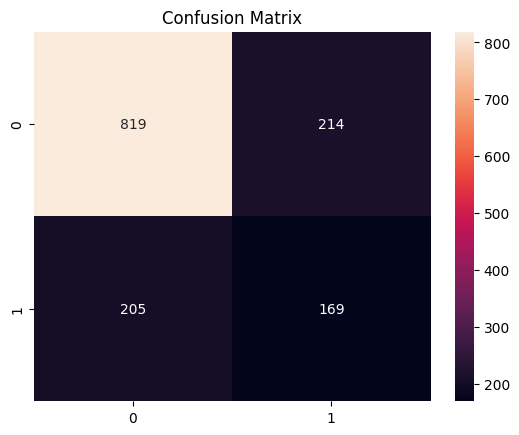

Used features: ['gender', 'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges']


In [2]:
# Modeling Setup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load and clean data
df = pd.read_csv('../data/churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Keep only relevant columns
selected_features = ['gender', 'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges', 'Churn']
df = df[selected_features]

# Encode categorical columns
label_cols = ['gender', 'StreamingTV', 'StreamingMovies', 'Contract']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Train-test split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Save model and scaler

joblib.dump(model, '../model/churn_model.pkl')
joblib.dump(scaler, '../model/scaler.pkl')

# Confirm features
print("Used features:", X.columns.tolist())


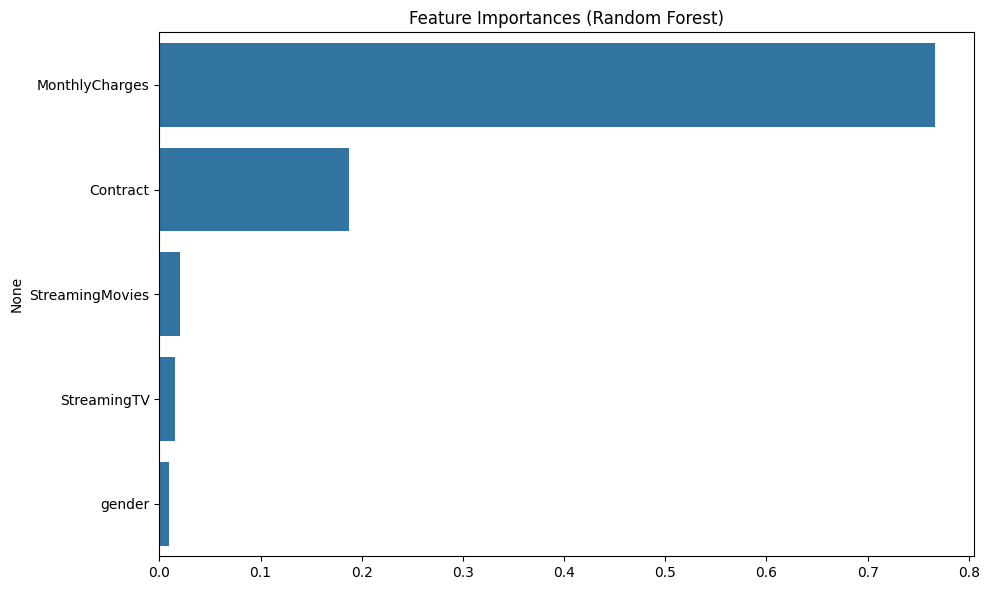

In [3]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [4]:
import joblib
joblib.dump(model, 'churn_model.pkl')



['churn_model.pkl']

In [6]:
import joblib

# Save model and scaler
joblib.dump(model, '../model/churn_model.pkl')
joblib.dump(scaler, '../model/scaler.pkl')



['../model/scaler.pkl']